In [1]:
# Lab 3 Minimizing Cost
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

In [4]:
model = tf.keras.Sequential()

In [5]:
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [6]:
sgd = tf.keras.optimizers.SGD(lr=0.1)
# practice: change learning rate and see its effects

In [7]:
model.compile(loss='mse', optimizer=sgd)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
#tf.keras.utils.plot_model(model, to_file='model.png')

In [10]:
# pip install netron
model.save('tf2-03-1.h5')
#netron.exe
#Serving at http://localhost:8080

In [11]:
# fit() trains the model and returns history of train
history = model.fit(x_train, y_train, epochs=100, verbose=0)

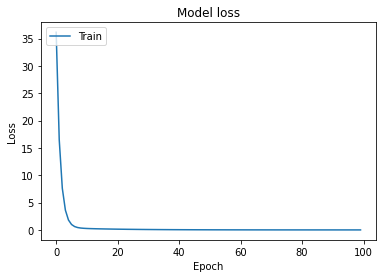

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
y_predict = model.predict(np.array([5, 4]))

In [14]:
print(y_predict)

[[-3.9441533]
 [-2.9712648]]
